In [110]:
import sys
import os
#instert path to modules: WORKING_DIR/py_mods/
base_dir = os.path.split(os.getcwd())[0]
mods_dir = base_dir +'/py_mods/'
sys.path.insert(0,mods_dir)
print sys.path[0]
from InitializeSAMOS import initialize_SAMOS 
from OverscanAndTrim import overscan_and_trim
from NormDivFlats import norm_div_flats
from OutlineSlits import outline_slits
from viewFITS import viewFITS
from matplotlib import pyplot as plt
#from PyrafIdentify import pyraf_identify
#import PyrafTransform
#the above are the main modules and functions called by the pipeline.

/Volumes/DanaExternalMacbook/PhD_Thesis/SAMOS_Project/SAMOS_pipeline/py_mods/


In [3]:
##INITIALIZATION##

'''
Step 1 organizes the data and stores relevant information based on FITS headers.
'''
data_dir = '2017-11-30'
mask = 'LMask2'
fuel_init = initialize_SAMOS(data_dir,mask)

Scanning /Volumes/DanaExternalMacbook/PhD_Thesis/SAMOS_Project/SAMOS_pipeline/LDSS3/2017-11-30

Found field image:
['ccd8152c1.fits', 'ccd8152c2.fits']
Found flats:
['ccd8161c1.fits', 'ccd8161c2.fits', 'ccd8162c1.fits', 'ccd8162c2.fits', 'ccd8163c1.fits', 'ccd8163c2.fits']
Found lamps:
['ccd8159c1.fits', 'ccd8159c2.fits', 'ccd8160c1.fits', 'ccd8160c2.fits']
Found science:
['ccd8157c1.fits', 'ccd8157c2.fits', 'ccd8158c1.fits', 'ccd8158c2.fits']
With exposure times:
[900. 900. 900. 900.]
Keeping science:
['ccd8157c1.fits', 'ccd8157c2.fits', 'ccd8158c1.fits', 'ccd8158c2.fits']
4 science frames read


In [4]:
##OVERSCAN AND TRIM##

'''
Step 2 collects the raw data sorted and stored in fuel_init.util._(data type)_.raw_files

- data are bias corrected and the overscan regions trimmed.
- individual chip images are stitched together, and cosmic rays cleaned.
-  saved as new fits files with updated headers

Results from this step stored in fuel_init.util.intermediate_dir, and the letter `b` appended to the file name.
'''
fuel_ost = overscan_and_trim(fuel_init)

Working on /Volumes/DanaExternalMacbook/PhD_Thesis/SAMOS_Project/SAMOS_pipeline/LDSS3/2017-11-30/ccd8159c1.fits
/Volumes/DanaExternalMacbook/PhD_Thesis/SAMOS_Project/SAMOS_pipeline/LDSS3/2017-11-30/ccd8159c1.fits
Writing /Volumes/DanaExternalMacbook/PhD_Thesis/SAMOS_Project/SAMOS_pipeline/LMask2/intermediates/bLMask28159c1.fits
/Volumes/DanaExternalMacbook/PhD_Thesis/SAMOS_Project/SAMOS_pipeline/LMask2/intermediates/bLMask28159c1.fits written.
Working on /Volumes/DanaExternalMacbook/PhD_Thesis/SAMOS_Project/SAMOS_pipeline/LDSS3/2017-11-30/ccd8159c2.fits
/Volumes/DanaExternalMacbook/PhD_Thesis/SAMOS_Project/SAMOS_pipeline/LDSS3/2017-11-30/ccd8159c2.fits
Writing /Volumes/DanaExternalMacbook/PhD_Thesis/SAMOS_Project/SAMOS_pipeline/LMask2/intermediates/bLMask28159c2.fits
/Volumes/DanaExternalMacbook/PhD_Thesis/SAMOS_Project/SAMOS_pipeline/LMask2/intermediates/bLMask28159c2.fits written.
Working on /Volumes/DanaExternalMacbook/PhD_Thesis/SAMOS_Project/SAMOS_pipeline/LDSS3/2017-11-30/ccd8160

In [5]:
##Flat Field Correction##

fuel_ndf = norm_div_flats(fuel_ost)

/Volumes/DanaExternalMacbook/PhD_Thesis/SAMOS_Project/SAMOS_pipeline/LMask2.db
Created list of flats in LMask2

Normalized master flat /Volumes/DanaExternalMacbook/PhD_Thesis/SAMOS_Project/SAMOS_pipeline/LMask2/intermediates/fbLMask2master_flat.fits has been created.
  Ready to be divided out of bias subtracted data frames.
Flat fielded data has been created and stored in /Volumes/DanaExternalMacbook/PhD_Thesis/SAMOS_Project/SAMOS_pipeline/LMask2/intermediates/fbLMask28158.fits
Shape of each data frame is:  (1500, 2048)
Flat fielded data has been created and stored in /Volumes/DanaExternalMacbook/PhD_Thesis/SAMOS_Project/SAMOS_pipeline/LMask2/intermediates/fbLMask28157.fits
Shape of each data frame is:  (1500, 2048)
Flat fielded data has been created and stored in /Volumes/DanaExternalMacbook/PhD_Thesis/SAMOS_Project/SAMOS_pipeline/LMask2/intermediates/fbLMask28159.fits
Shape of each data frame is:  (1500, 2048)
Flat fielded data has been created and stored in /Volumes/DanaExternalMacb

In [ ]:
for k in vars(fuel_ost).items():
    key = k[0]
    try: 
        key_att = vars(k[1])
        keyattitems = [i for i in key_att.items()]
        print '%s: %s \n'%(key,[i[0] for i in key_att.items()])
        for kk in keyattitems:
            kkey = kk[0]
            try:
                kkey_att = vars(kk[1])
                print '%s.%s: %s \n'%(key,kkey,[j[0] for j in kkey_att.items()])
        
            
            except TypeError:
                pass
    except TypeError:
        print '%s: %s \n'%(key,k[1])


In [6]:
print fuel_ost.util.slitflat.master_file

/Volumes/DanaExternalMacbook/PhD_Thesis/SAMOS_Project/SAMOS_pipeline/LMask2/intermediates/fbLMask2master_flat.fits


In [123]:
import viewFITS
reload(viewFITS)

<module 'viewFITS' from '/Volumes/DanaExternalMacbook/PhD_Thesis/SAMOS_Project/SAMOS_pipeline/py_mods/viewFITS.pyc'>

In [124]:
from viewFITS import viewFITS

Filename: /Volumes/DanaExternalMacbook/PhD_Thesis/SAMOS_Project/SAMOS_pipeline/LMask2/intermediates/fbLMask2master_flat.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     108   (2048, 1500)   float32   


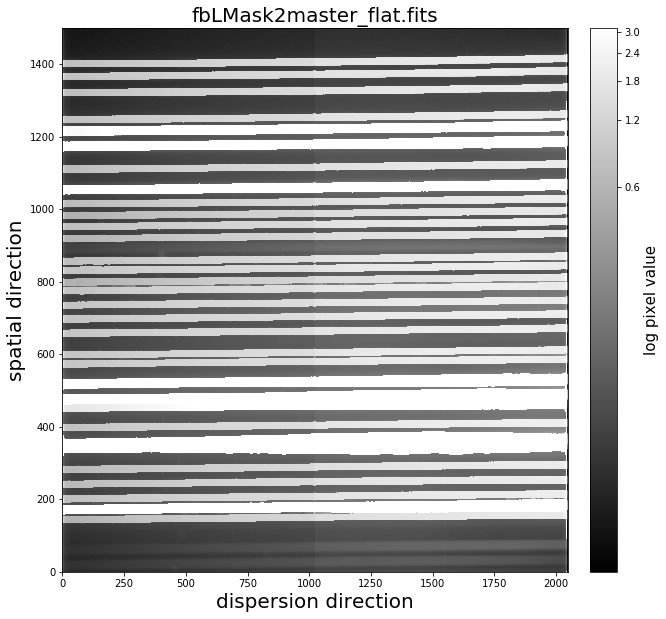

In [125]:
master_flat = viewFITS().view_FITS(fuel_ost.util.slitflat.master_file) 
master_flat.fig #display figure